# Topic: Cardio Vascular

Dataset taken from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

---

## Problem Description:






## Table of Contents:
1.0 Importing Essential Libraries and Dataset   
1.1 Importing Essential Functions   
1.2 Describing the Variables

2.0 Plotting the different Variables   
2.1 Numerical Variable Analysis   
2.2 Categorical Variable Analysis



---


---
## 1.0 Importing Essential Libraries & Dataset

In [3]:
# General Propose
import pickle
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scikitplot import metrics as mt

# Hipo Test
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind


# Pre-processing
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

# Modelling
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans


# Evaluation
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, precision_score, f1_score, recall_score
from yellowbrick.classifier.threshold import discrimination_threshold

# Set options and warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('MAX_ROWS', None)

df = pd.read_excel("cardio_train.xlsx")
df = df.reset_index(drop=True)
df

OptionError: 'Pattern matched multiple keys'

In [9]:
df.describe()

NameError: name 'df' is not defined

In [10]:
df.info()

NameError: name 'df' is not defined

# 1.1 Importing essential functions: 
---

1. Linear Regression function
2. Goodness of Fit function
3. Remove of Outliers
4. Balanced Target function
 

In [11]:
def lr(X, y, df):
    
    
    X = pd.DataFrame(df[X])
    y = pd.DataFrame(df[y])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train ,y_train)
    
    print('Intercept \t: b = ', model.intercept_)
    print('Coefficients \t: a = ', model.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = model.intercept_ + model.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
   
    f, axes = plt.subplots(1, 2, figsize=(24, 12))

    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression for Training Set")
    
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction for Testing Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    
# function to test goodness of fit using the Test Set
def gof_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
            
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    df_out = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    count = ( ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr) ))).sum()
    print(count)
    return df_out
    

# Helper Functions
def balanced_target(target, dataset, hue=None):
    """
    Function to check the balancing of the target variable.

    :target:  An pd.Series of the target variable that will be checked.
    :dataset: An Dataframe object. 
    """
    sns.set(style='darkgrid', palette='Accent')
    ax = sns.countplot(x=target, hue=hue, data=dataset)
    ax.figure.set_size_inches(10, 6)
    ax.set_title('Cardio Distribution', fontsize=18, loc='left')
    ax.set_xlabel(target, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax=ax


def univariate_analysis(target, df):
    """
    Function to perform univariate analysis.

    df: DataFrame
    """
    for col in df.columns.to_list():

        fig = sns.displot(x=col, hue=target, data=df, kind='hist')
        fig.set_titles(f'{col}\n distribuition', fontsize=16)
        fig.set_axis_labels(col, fontsize=14)


def multi_histogram(data: pd.DataFrame, variables: list) -> None:

    # set of initial plot posistion
    plt.figure(figsize=(18, 10))
    n = 1
    for column in data[variables].columns:
        plt.subplot(3, 3, n)
        _ = sns.distplot(a=data[column], bins=50, hist=True)
        n += 1

    plt.subplots_adjust(hspace=0.3)

    plt.show()



def multi_boxplot(data: pd.DataFrame, variables: list) -> None:

    """
    Function to check for outliers visually through a boxplot

    data: DataFrame

    variable: list of numerical variables
    """

    # set of initial plot posistion
    plt.figure(figsize=(18, 10))
    n = 1
    for column in data[variables].columns:
        plt.subplot(3, 3, n)
        _ = sns.boxplot(x=column, data=data)
        n += 1

    plt.subplots_adjust(hspace=0.3)

    plt.show()


def hipo_test(*samples):

    samples = samples

    try:
        if len(samples) == 2:
            stat, p = ttest_ind(*samples)
        elif len(samples) > 2:
            stat, p = f_oneway(*samples)
    except:
        raise Exception("Deve ser fornecido pelo menos duas samples!!!")

    if p < 0.05:
        print(f'O valor de p é: {p}')
        print('Provável haver diferença')
    else:
        print(f'O valor de p é: {p}')
        print('Provável que não haja diferença')

    return stat, p


def point_bi_corr(a, b):

    """
    Function to calculate point biserial correlation coefficient heatmap function
    Credits: Bruno Santos - Comunidade DS

    :a: input dataframe with binary variable
    :b: input dataframe with continous variable
    """

    # Get column name
    a = a.values.reshape(-1)
    b = b.columns.reshape(-1)

    # apply scipys point-biserial
    stats.pointbiserialr(a, b)

    # correlation coefficient array
    c = np.corrcoef(a, b)

    # dataframe for heatmap
    df = pd.DataFrame(c, columns=[a, b], index=[a, b])

    # return heatmap
    return sns.heatmap(df, annot=True).set_title('{} x {} correlation heatmap'.format(a, b));


def change_threshold_lgbm(X, y, model, n_splits, thresh):

    # cross-validação
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

    acc = []
    kappa = []
    recall = []
    for linhas_treino, linhas_valid in skf.split(X, y):

        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

        pred_prob = model.predict_proba(X_valid)

        for i in range(0, len(pred_prob)):
            if pred_prob[i, 1] >= thresh:
                pred_prob[i, 1] = 1
            else:
                pred_prob[i, 1] = 0

        Acc = accuracy_score(y_valid, pred_prob[:, 1])
        Kappa =  cohen_kappa_score(y_valid, pred_prob[:, 1])
        Recall = recall_score(y_valid, pred_prob[:, 1])
        acc.append(Acc)
        kappa.append(Kappa)
        recall.append(Recall)

    print('####### Bussines Metrics #######')
    print('\n')
    acc_inc = np.mean(acc) - 0.50
    prc_inc = round((acc_inc/0.05)*500, 2)
    print(f'Increased precision: {round(acc_inc,2)}')
    print(f'Price Increased in: {prc_inc}')
    print(f'Percentual of Price increassing: {round(prc_inc/500,2)}')
    print('\n')

    # print classification report
    print('####### Machine Learning Metrics #######\n')
    print(classification_report(y_valid, pred_prob[:,1], digits=2))

    # Confusion Matrix
    mt.plot_confusion_matrix(y_valid, pred_prob[:,1], normalize=False, figsize=(10,8))

    return pred_prob[:, 1]


def change_threshold_lr(X, y, model, n_splits, thresh):
    # cross-validação
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

    acc = []
    kappa = []
    recall = []
    for linhas_treino, linhas_valid in skf.split(X, y):

        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

        y_scores_final = model.decision_function(X_valid)
        y_pred_recall = (y_scores_final > thresh)

        Acc = accuracy_score(y_valid, y_pred_recall)
        Kappa =  cohen_kappa_score(y_valid, y_pred_recall)
        Recall = recall_score(y_valid, y_pred_recall)
        acc.append(Acc)
        kappa.append(Kappa)
        recall.append(Recall)

    print('####### Bussines Metrics #######\n')

    acc_inc = np.mean(acc) - 0.50
    prc_inc = round((acc_inc/0.05)*500, 2)
    print(f'Increased precision: {round(acc_inc,2)}')
    print(f'Price Increased in: {prc_inc}')
    print(f'Percentual of Price increassing: {round(prc_inc/500,2)}')
    print('\n')

    print('####### Machine Learning Metrics #######\n')
    print(f'New kappa: {cohen_kappa_score(y_valid,y_pred_recall)}\n')
    print(classification_report(y_valid, y_pred_recall, digits=2))


    return y_pred_recall


################################################# Custons Transformers ###########################################################

class PreProcessingTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        Xtemp = X.copy()

        # Height
        index_height = Xtemp.loc[Xtemp['height'] > 230, ['height']].index
        Xtemp.drop(index_height, inplace=True)
        index_height1 = Xtemp.loc[Xtemp['height'] < 112, ['height']].index
        Xtemp.drop(index_height1, inplace=True)

        # Weight
        index_weight = Xtemp.loc[Xtemp['weight'] < 40, ['weight']].index
        Xtemp.drop(index_weight, inplace=True)

        # ap_hi
        index_ap_hi = Xtemp.loc[Xtemp['ap_hi'] < 10, ['ap_hi']].index
        Xtemp.drop(index_ap_hi, inplace=True)

        # ap_lo
        index_ap_lo = Xtemp.loc[Xtemp['ap_lo'] < 5, ['ap_lo']].index
        Xtemp.drop(index_ap_lo, inplace=True)

        # SMOTE + TOMEKLINK
        X = Xtemp.drop('cardio', axis=1)
        y = Xtemp['cardio']

        smt = SMOTETomek(random_state=42)
        Xres, yres = smt.fit_resample(X, y)
        Xtemp = pd.concat([Xres, yres], axis=1)

        return Xtemp


class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        Xtemp = X.copy()

        # Cluster based var
        kmeans = KMeans(n_clusters=2, init='k-means++',n_init=20, random_state=0).fit(Xtemp)
        Xtemp['kmeans_cat'] = kmeans.labels_

        # # Cluster GMM
        # gmm = GaussianMixture(n_components=3).fit(Xtemp)
        # Xtemp['gauss_cat'] = gmm.predict(Xtemp)

        # Year_age
        Xtemp['year_age'] = Xtemp['age'] / 365

        # drop 'id' and 'age' 'smoke','alco','gluc', 'ap_lo', 'cholesterol', 'height', 'active', 'weight'
        Xtemp.drop(['id', 'age'], inplace=True, axis=1)

        # IMC
        Xtemp['imc'] = Xtemp['weight']/(Xtemp['height']/100)**2

        # cat_dwarfism
        Xtemp['cat_Dwarfism'] = [1 if value < 145 else 0 for value in Xtemp['height']]

        # ap_hi divide 10
        Xtemp.loc[Xtemp['ap_hi'] > 220, ['ap_hi']] = Xtemp.loc[Xtemp['ap_hi'] > 220, ['ap_hi']]/10

        # ap_lo divide 10
        Xtemp.loc[Xtemp['ap_lo'] > 190, ['ap_lo']] = Xtemp.loc[Xtemp['ap_lo'] > 190, ['ap_lo']]/10

        # ap_hi divide 10
        Xtemp.loc[Xtemp['ap_hi'] > 220, ['ap_hi']] = Xtemp.loc[Xtemp['ap_hi'] > 220,['ap_hi']]/10

        # ap_hi divide 10
        Xtemp.loc[Xtemp['ap_hi'] > 220, ['ap_hi']] = Xtemp.loc[Xtemp['ap_hi'] > 220,['ap_hi']]/10

        # ap_lo divide 10
        Xtemp.loc[Xtemp['ap_lo'] > 190, ['ap_lo']] = Xtemp.loc[Xtemp['ap_lo'] > 190,['ap_lo']]/10

        return Xtemp


class CatBloodPressureTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        Xtemp = X.copy()

        # cat_bloodpressure
        def cat_bloodpressure(df):

            if df['ap_hi'] < 90 and df['ap_lo'] < 60:
                return 1 #Hipotensão
            elif 90 <= df['ap_hi'] < 140 and 60 <= df['ap_lo'] < 90:
                return 2    # Pré-Hipotensão
            elif 140 <= df['ap_hi'] < 160 and 90 <= df['ap_lo'] < 100:
                return 3  # 'Hipertensão estagio1'
            elif df['ap_hi'] >= 160 and df['ap_lo'] >= 100:
                return 4 # 'Hipertensão estagio2'
            else:
                return 5 # 'no_cat'

        # cat_bloodpressure
        Xtemp['cat_bloodpressure'] = Xtemp.apply(cat_bloodpressure, axis=1)

        return Xtemp


class TotalPressureTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):

        return self

    def transform(self, X, y=None):

        Xtemp = X.copy()

        # total_preassure
        Xtemp['total_pressure'] = Xtemp['ap_hi'] + Xtemp['ap_lo']

        return Xtemp


class MyRobustScalerTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        Xtemp = X.copy()

        scaler = RobustScaler()
        Xscaled = scaler.fit_transform(Xtemp)
        Xtemp = pd.DataFrame(Xscaled, columns=Xtemp.columns.to_list())

        return Xtemp


# 1.2 Describing the Variables:
---

### Different Variables:

    1. Age - Numerical - Days
    2. Height - Numerical - Cm
    3. Weight - Numerical - Kg
    4. Gender - Categorical - 1/0
    5. Systolic Blood Pressure (ap_hi) - Numerical - mmHg
    6. Systolic Blood Pressure (ap_lo) - Numerical - mmHg
    7. Cholesterol - Categorical - 1-3
    8. Glucose - Categorical - 1-3
    9. Smoke - Categorical - 1/0
    10. Alcohol Intake - Categorical - 1/0
    11. Physical Activity - Categorical - 1/0
    12. Cardio - Categorical - 1/0

##  2.0 Plotting the different Variables:
---

First we will explore the Numerical Variables, then the Categorical Variables.

### 2.1 Numerical Variable Analysis

For Numerical Variables, we will use a boxplot and plot them against cardio (i.e the presence of cardio vascular disease)

Afterwhich, we will plot a histogram for each of the variables to check their skew.

In [12]:
df_new = df[['ap_hi', 'cardio']].copy()

df_new = remove_outliers(df_new)
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df_new, orient='v',x='cardio',y='ap_hi')

NameError: name 'df' is not defined

Based on the American Heart Association guidelines for blood pressure , anything outside the range of for Systolic BP (ap_hi) from 50 to 200 is abnormal. Hence, we will be removing them from the api_hi column. For Diastolic BP (ap_lo) anything outside the range from 60 to 90 is abnormal, but the extreme and uncommon cases are those that are below 50 and above 120. Hence, we will be removing them from the dataset.

- Taken from https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

In [13]:
df = df.copy()
index = df.loc[(df['ap_hi']<50)|(df['ap_hi']>200),['ap_hi']].index
df.drop(index, inplace=True)
index = df.loc[(df['ap_lo']<50)|(df['ap_lo']>120),['ap_lo']].index
df.drop(index, inplace=True)

NameError: name 'df' is not defined

<AxesSubplot:xlabel='cardio', ylabel='ap_lo'>

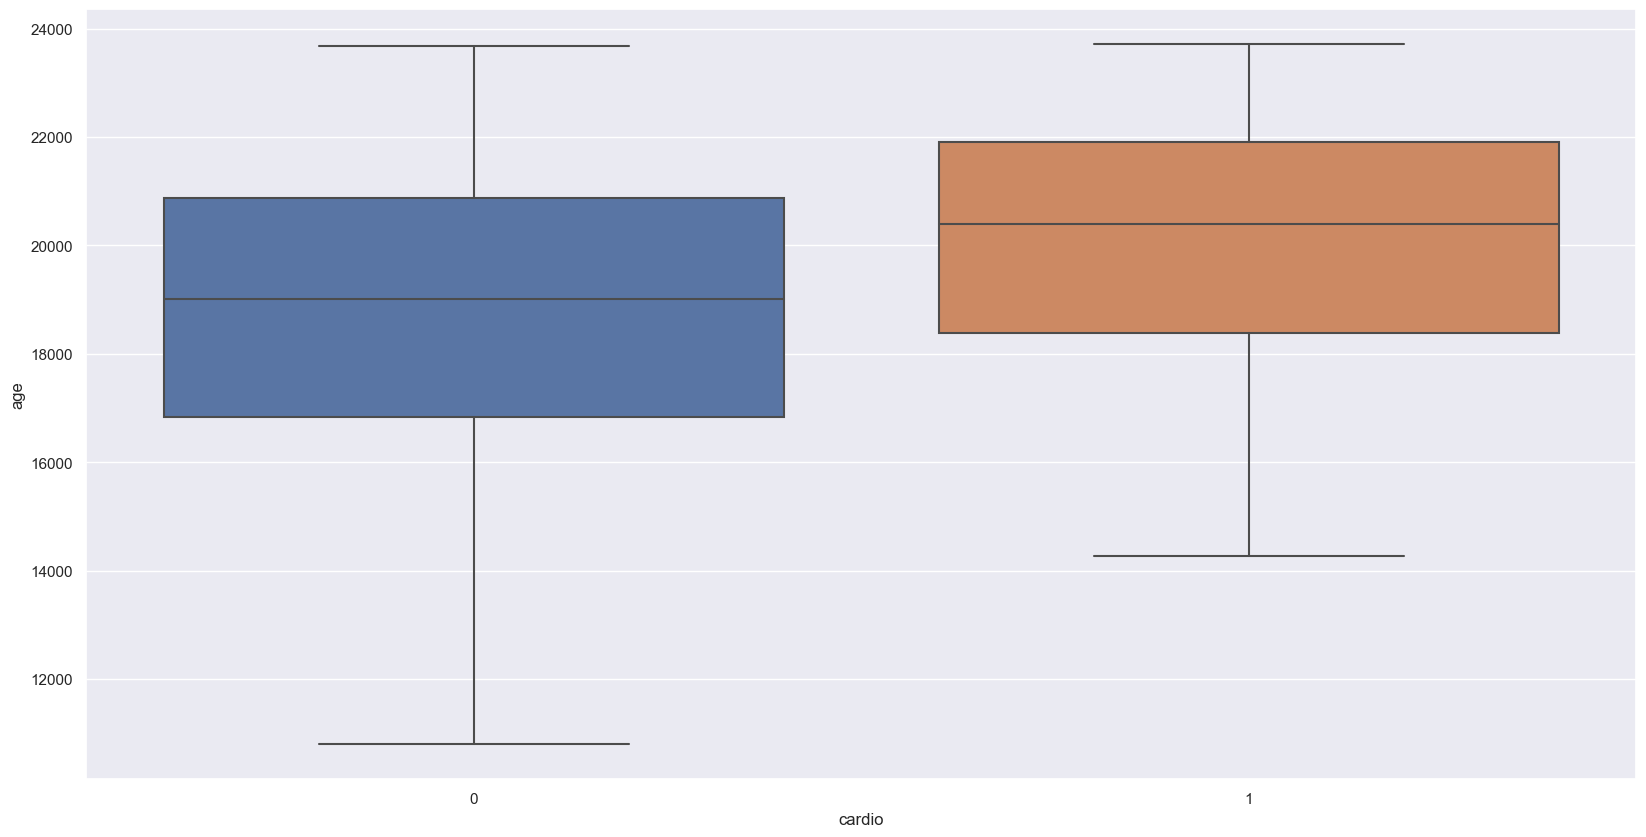

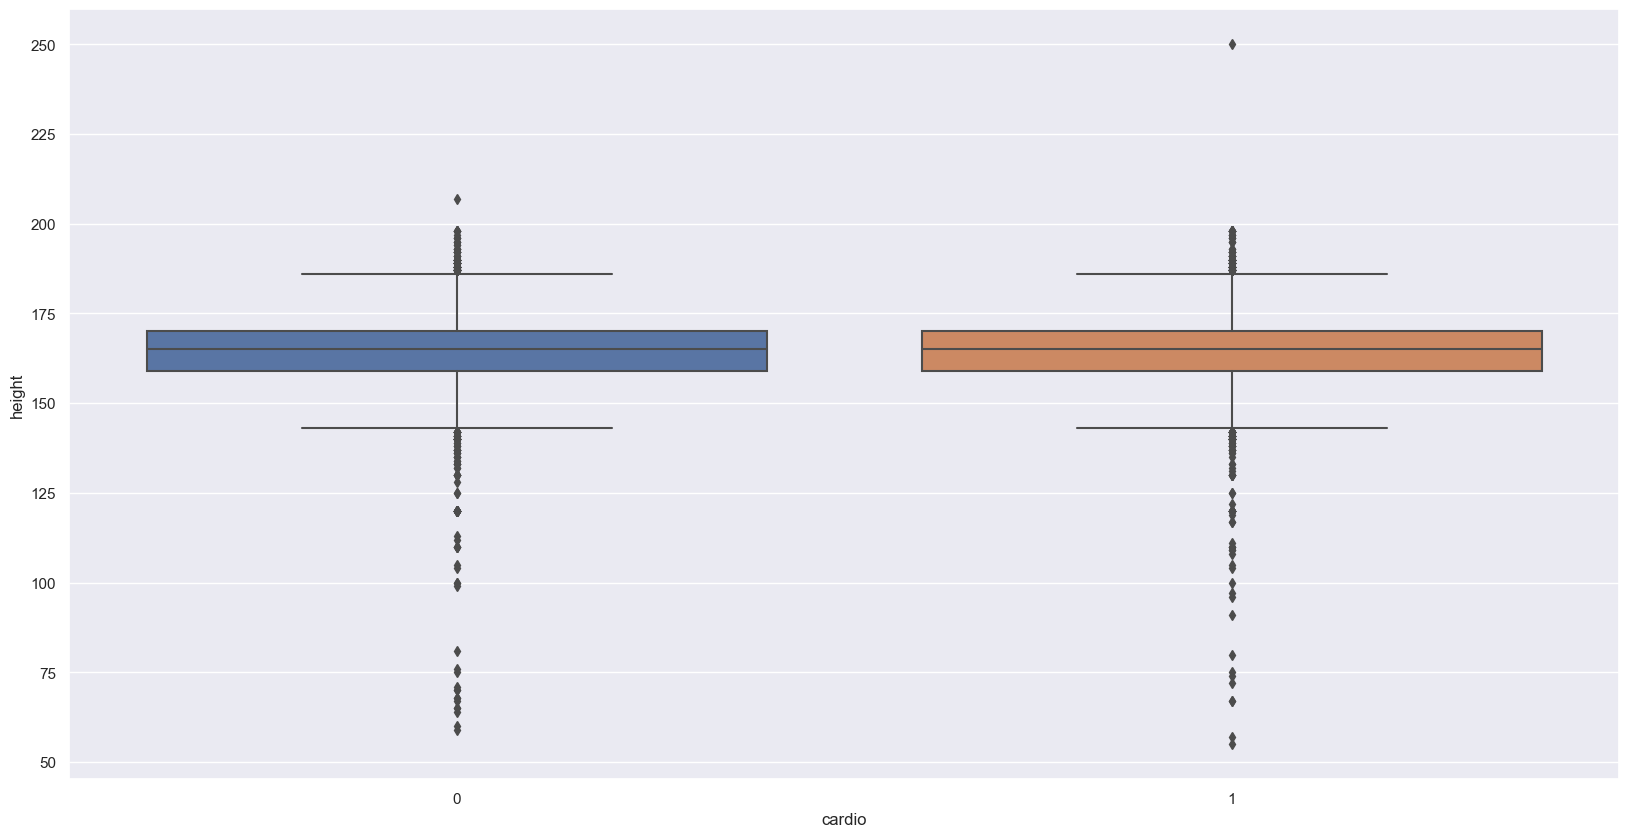

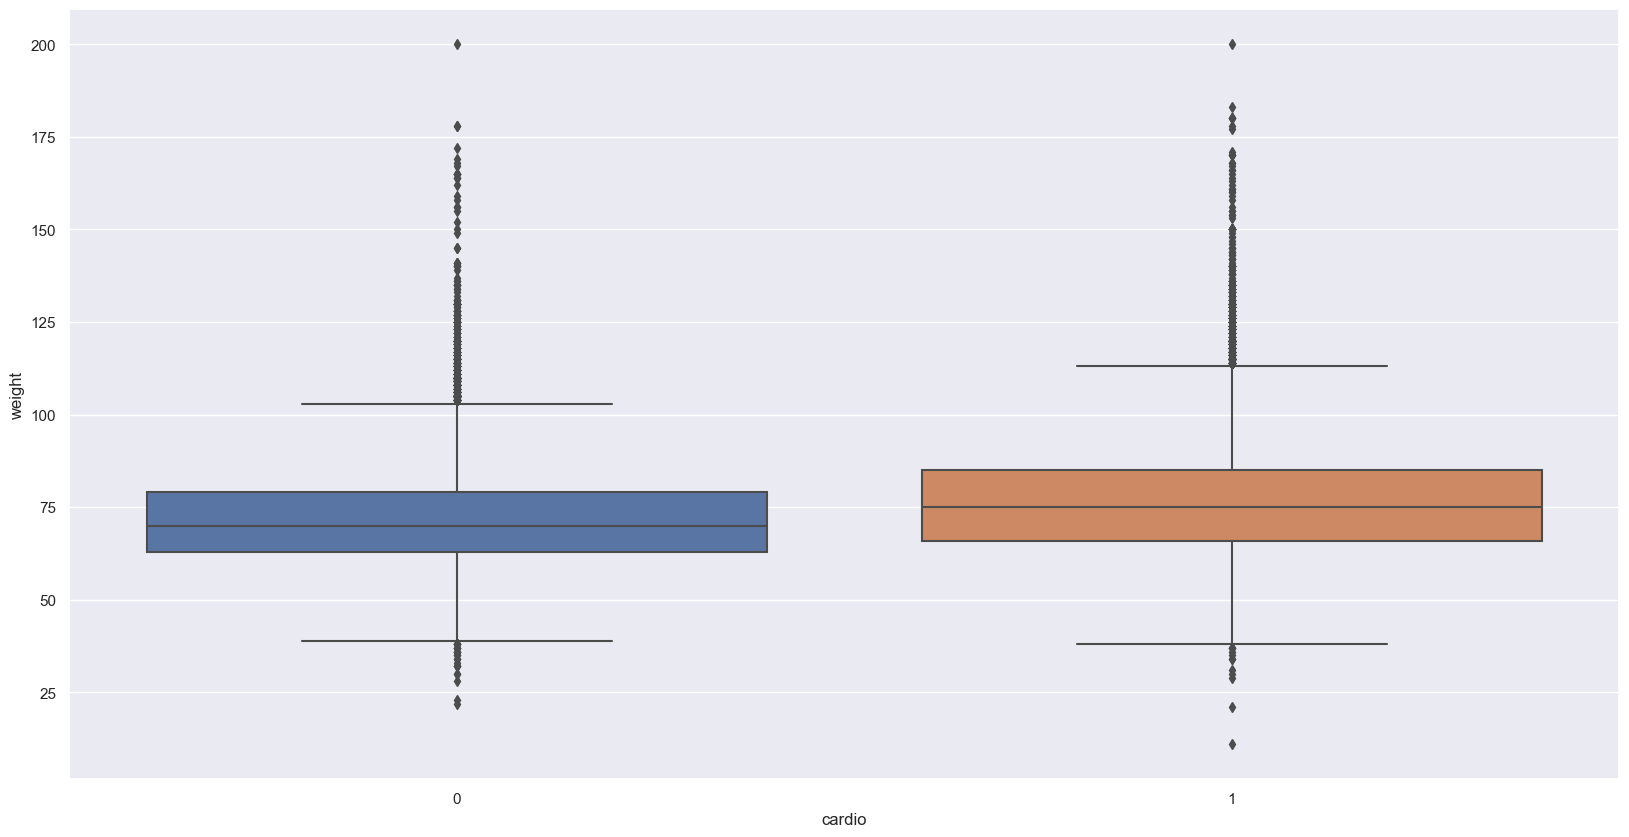

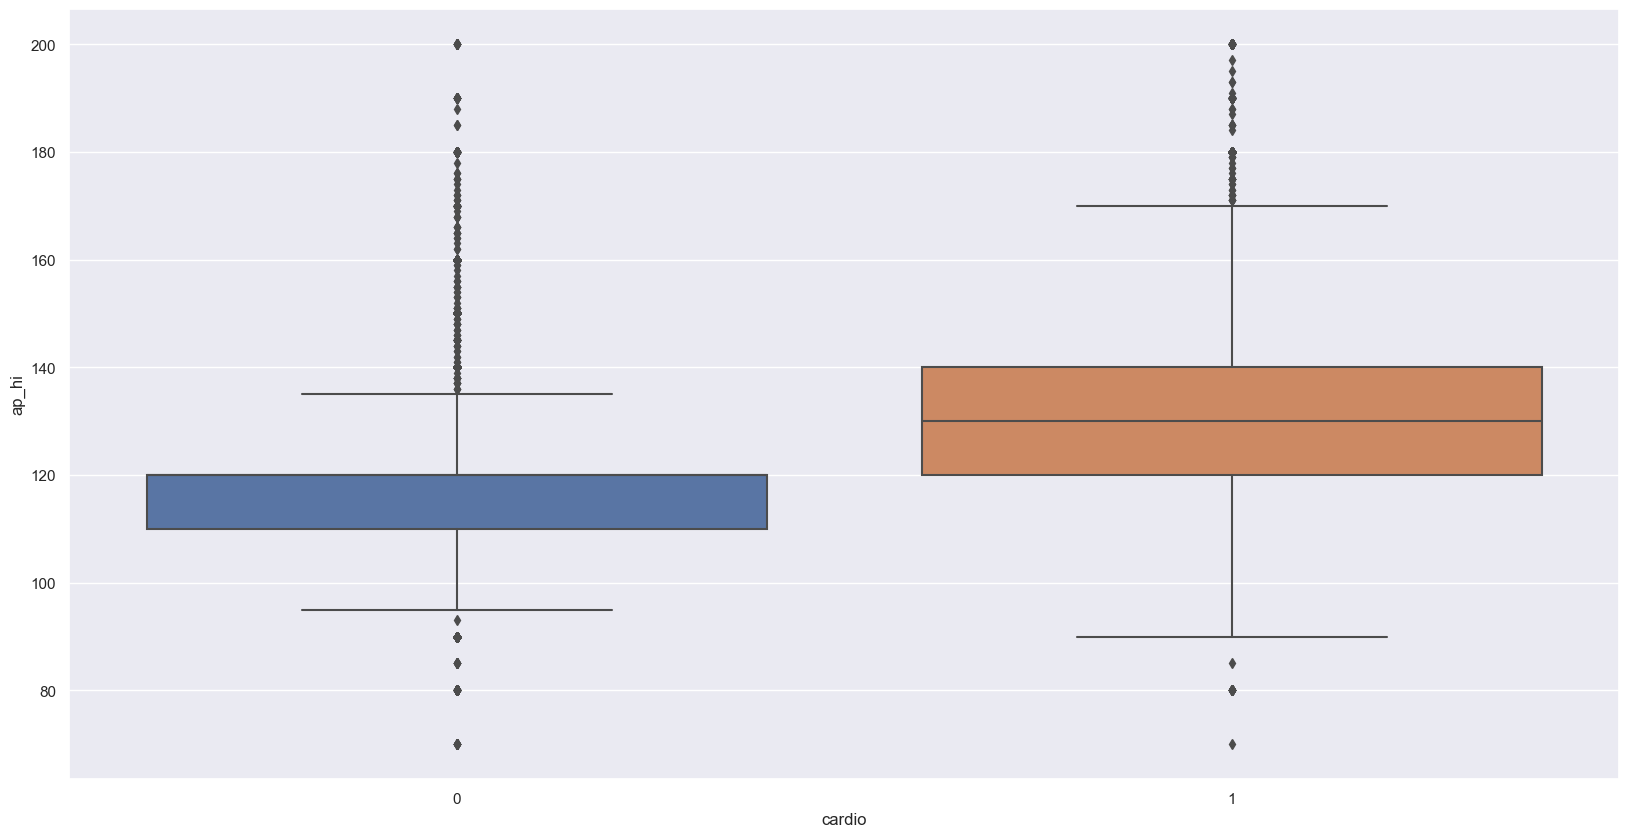

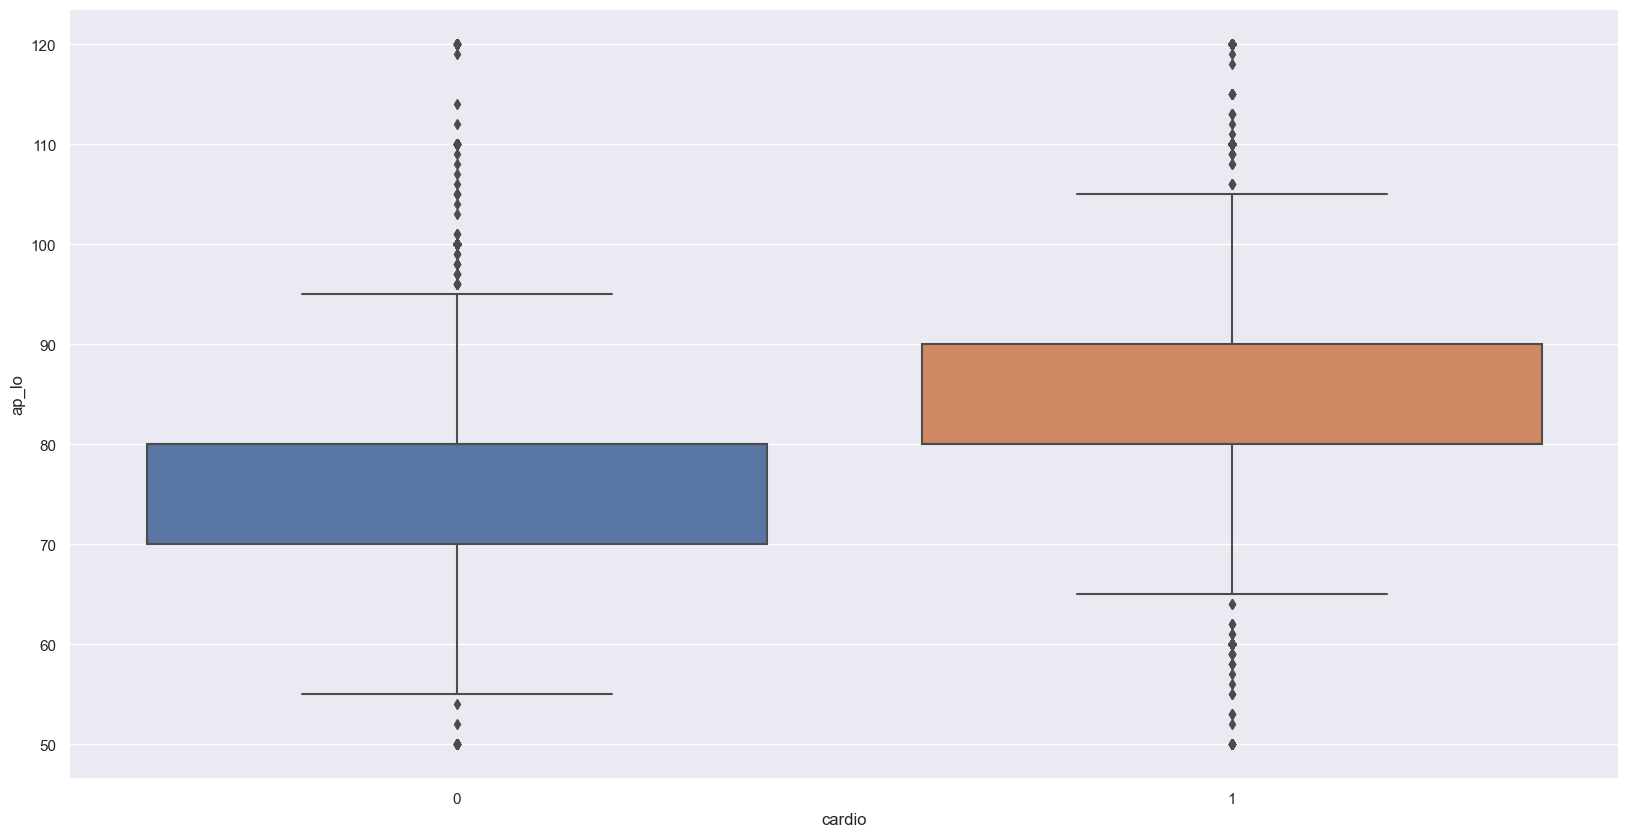

In [9]:
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df, orient='v',x='cardio',y='age')
# print(df['weight'].describe())
# print('\n')
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df, orient='v',x='cardio',y='height')
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df, orient='v',x='cardio',y='weight')
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df, orient='v',x='cardio',y='ap_hi')
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df, orient='v',x='cardio',y='ap_lo')

<AxesSubplot:xlabel='ap_lo', ylabel='Count'>

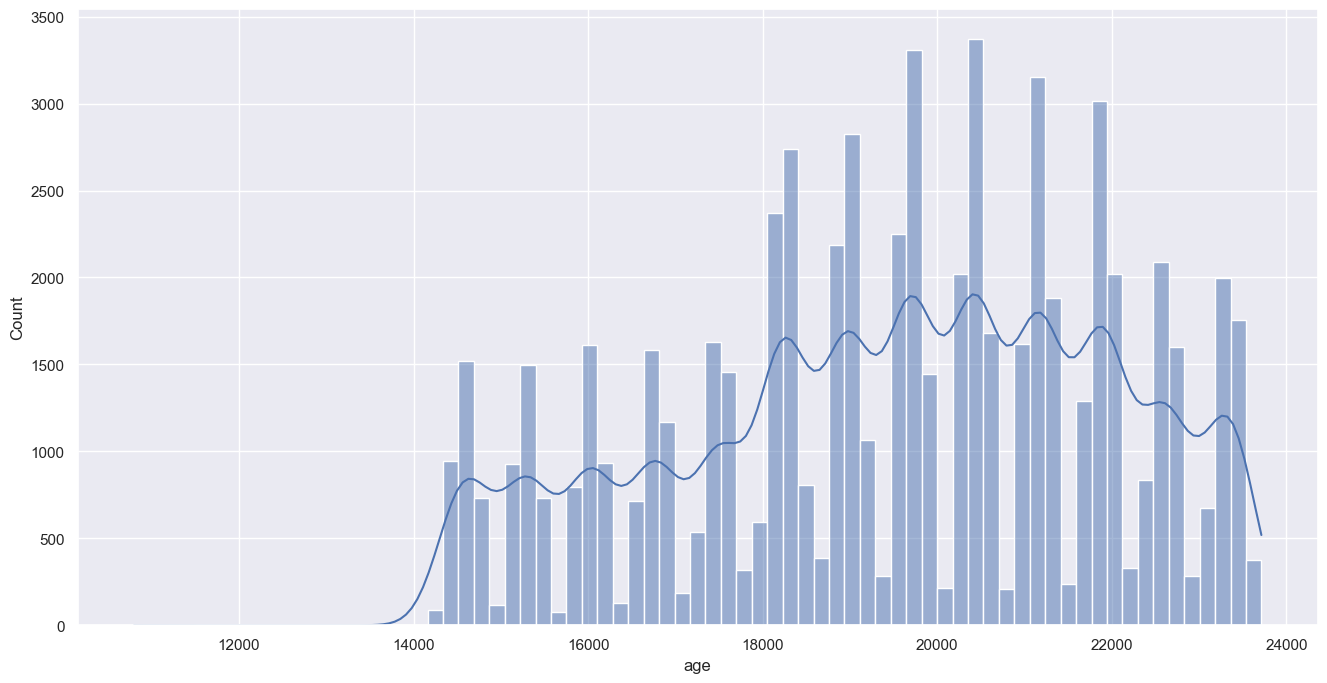

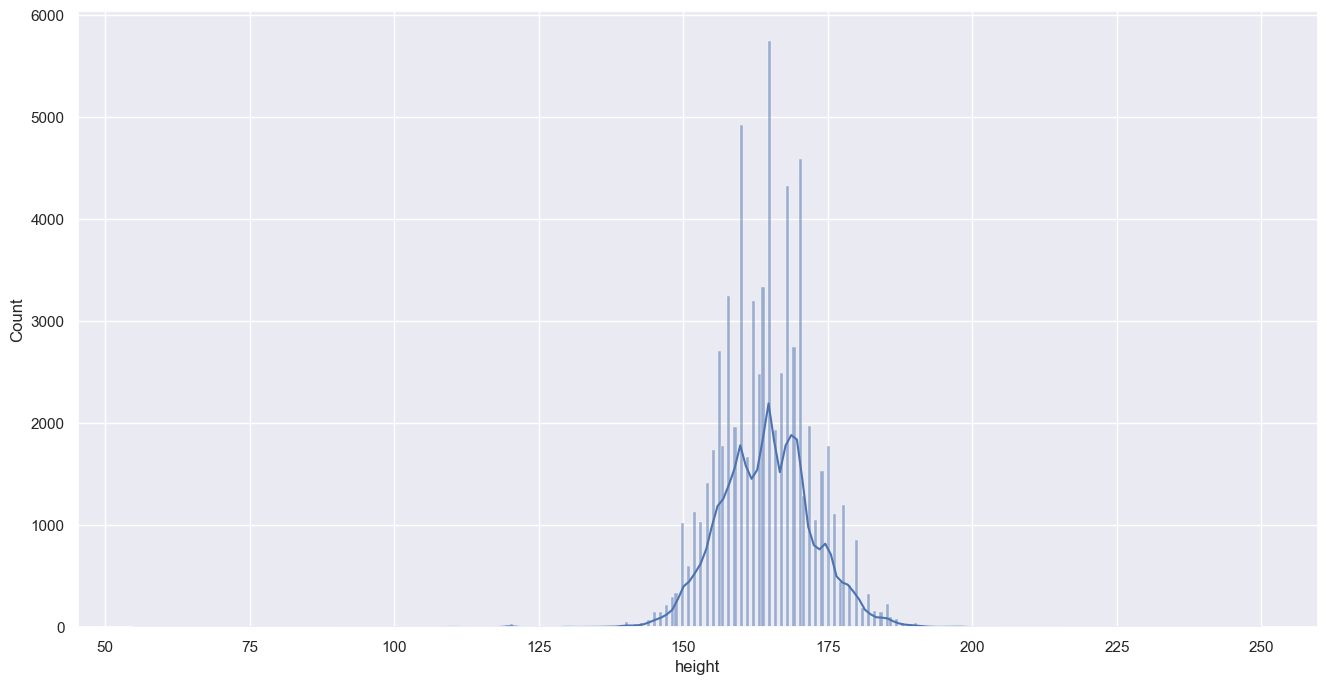

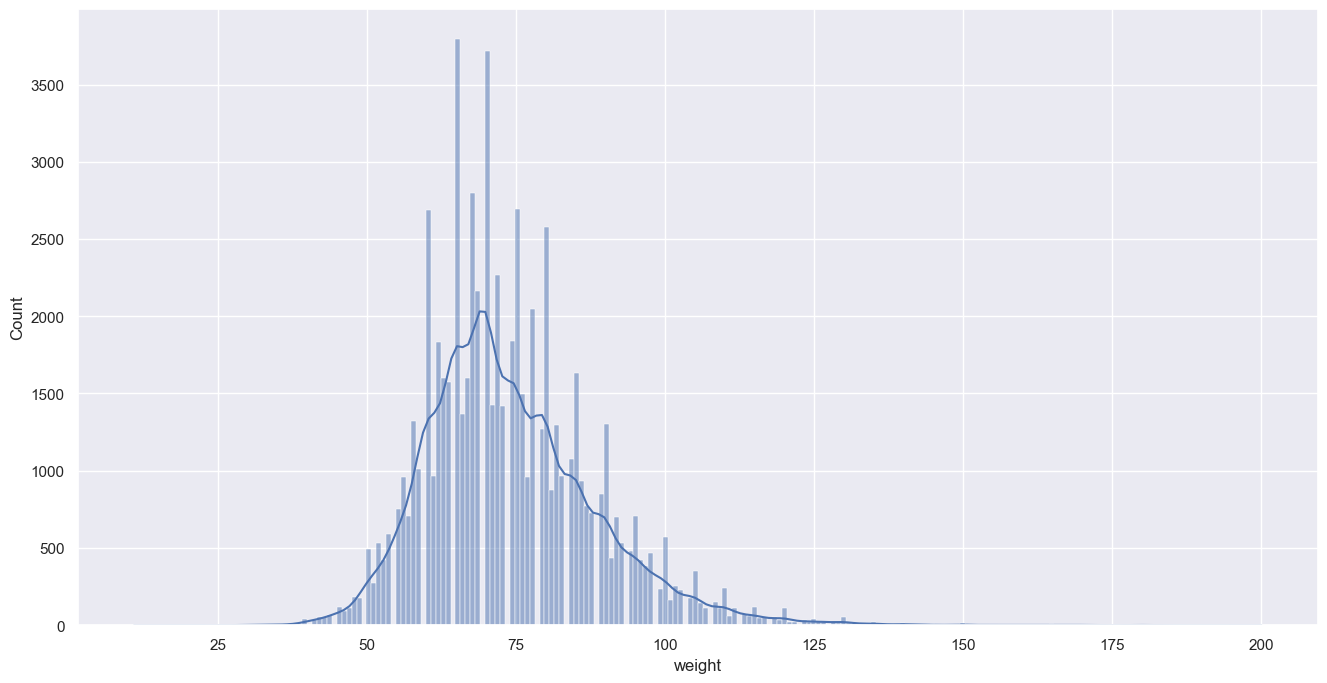

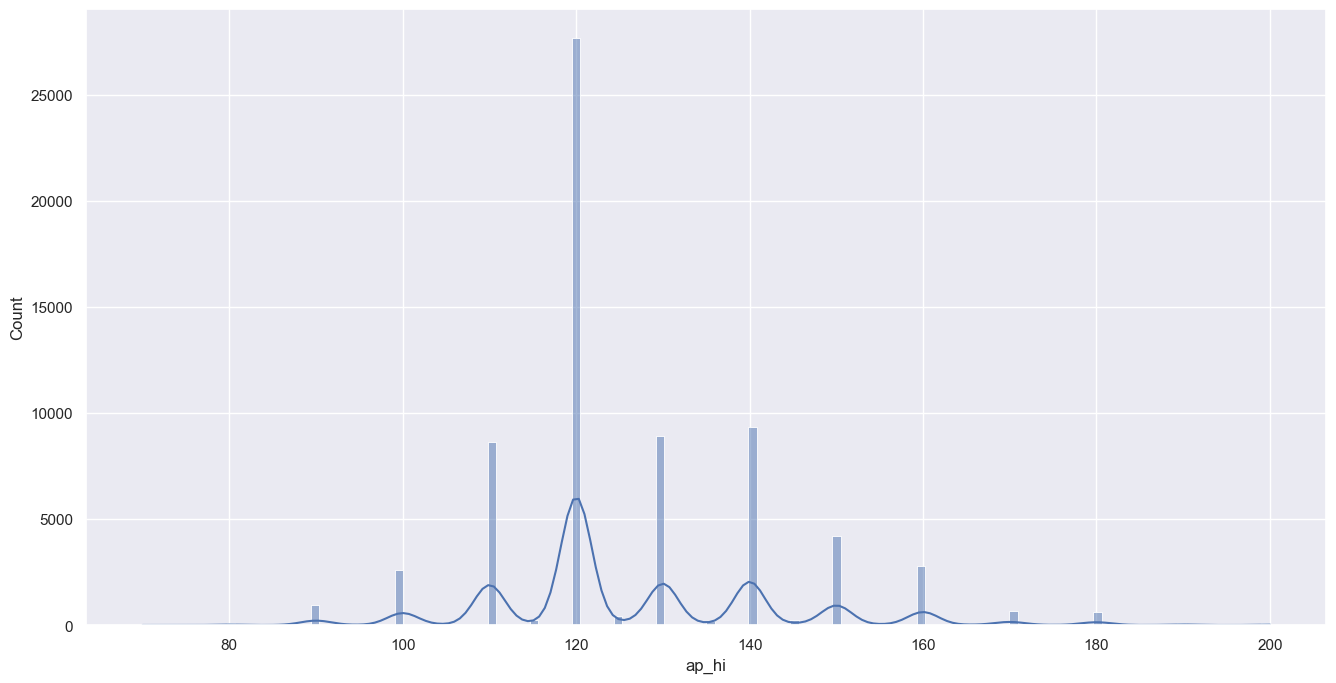

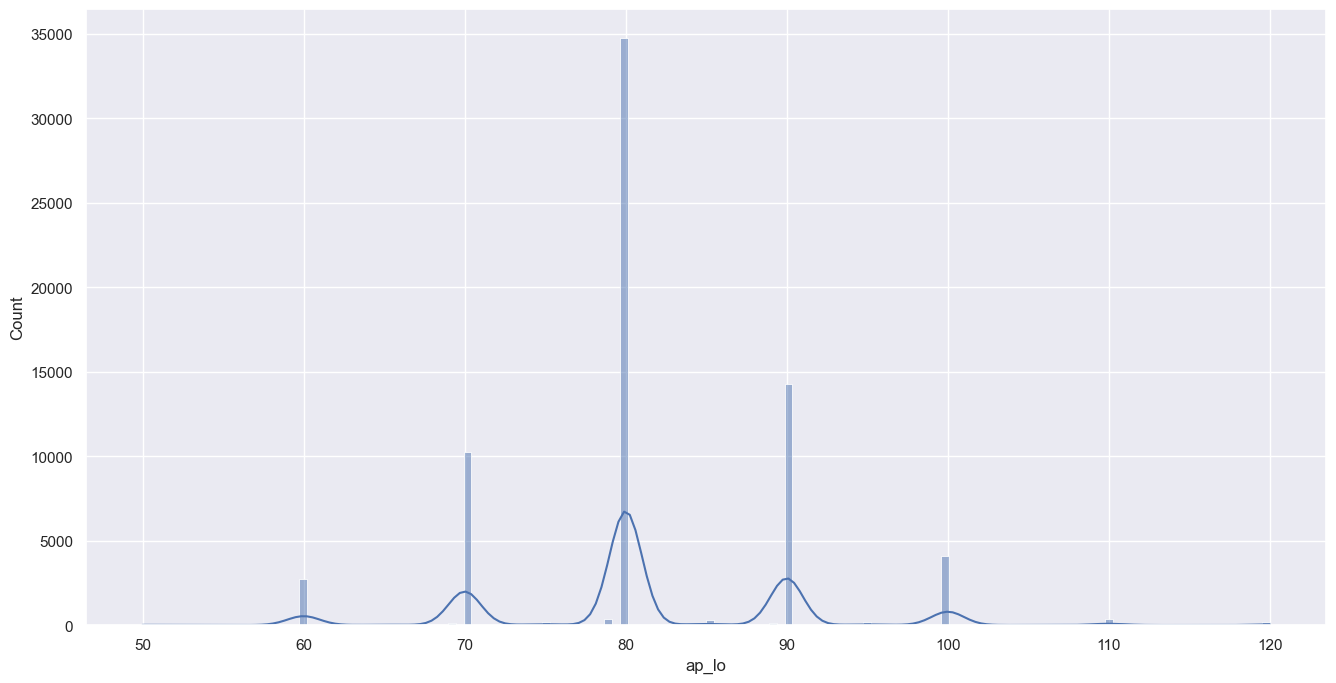

In [10]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df["age"], kde=True)
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df["height"], kde=True)
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df["weight"], kde=True)
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df["ap_hi"], kde=True)
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df["ap_lo"], kde=True)

#### After looking at the height and weight plots, our team feels that having BMI is a better indicator that takes into consideration both the height and weight to predict cardio. Hence, we will create a BMI column using the formula: weight/(height ** 2)

In [11]:
df['BMI'] = df['weight'] / ((df['height'])/100)**2
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1,27.099251


<AxesSubplot:xlabel='cardio', ylabel='BMI'>

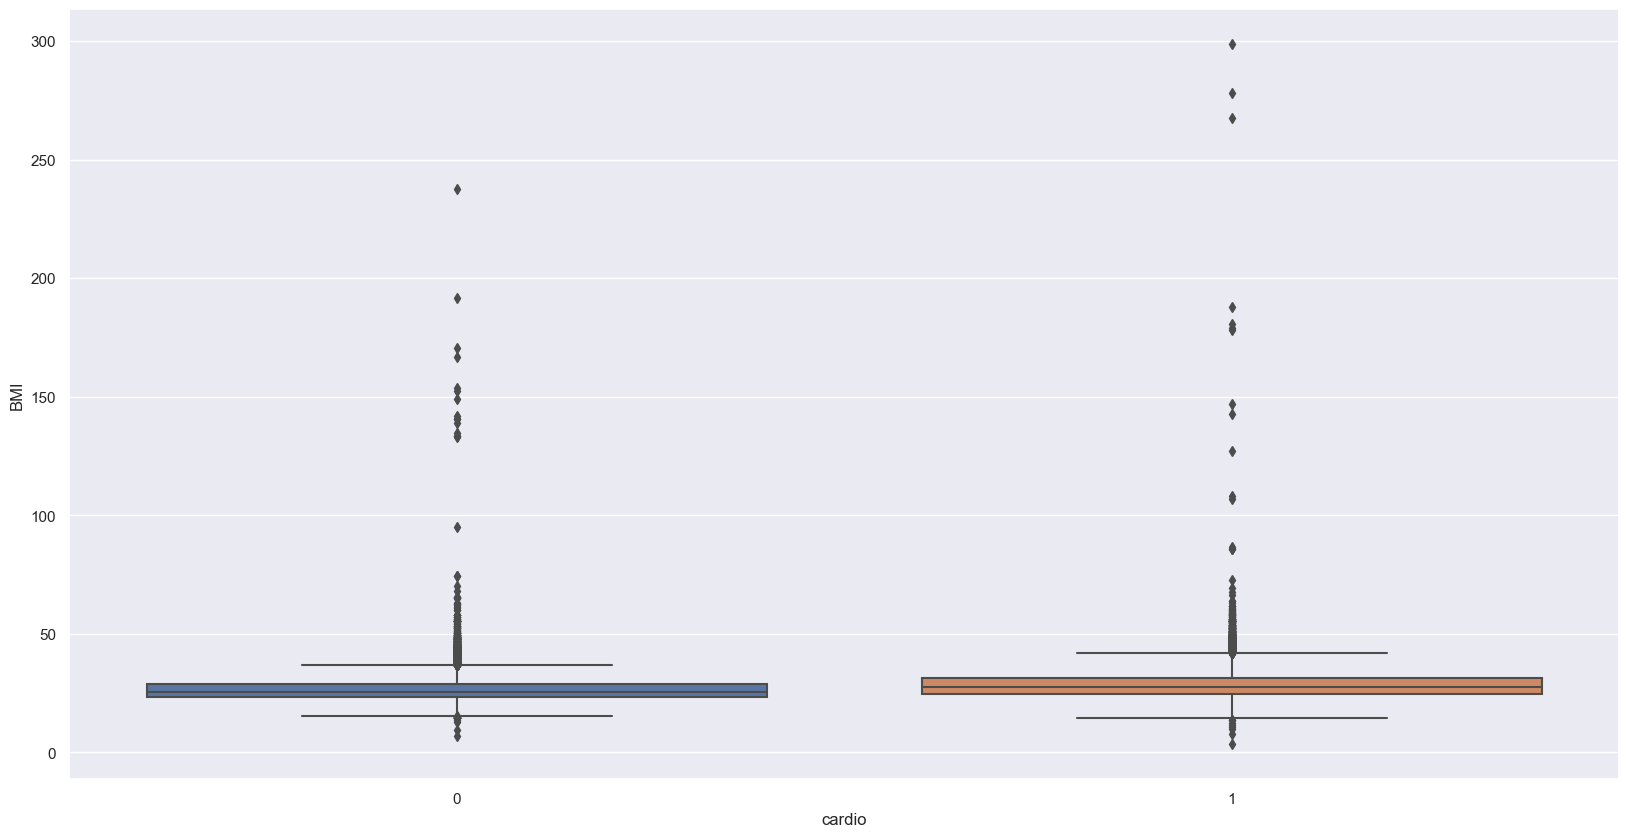

In [12]:
f = plt.figure(figsize=(20,10))
sns.boxplot(data=df, orient='v',x='cardio',y='BMI')

In [13]:
print("BMI # > 130: " , df.loc[df['BMI']>130,:].size)
print("BMI # < 10: " , df.loc[df['BMI']<10,:].size)

BMI # > 130:  336
BMI # < 10:  70


#### Since it is extremely rare for anyone's BMI to be above 130 and below 10, there may have been errors in the data. Hence, we will remove them from the dataset.

In [14]:
df = df.copy()
index = df.loc[(df['BMI']<10)|(df['BMI']>130),['BMI']].index
df.drop(index, inplace=True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1,27.099251


In [15]:
df[['age','height','weight','ap_hi','ap_lo']].skew(axis=0,skipna=True)

age      -0.305421
height   -0.124933
weight    0.990173
ap_hi     0.815966
ap_lo     0.256444
dtype: float64

From the data, ap_hi is the most skewed from a regular normal distribution. With a high positive skew of 85.296214.

---

### Plotting Correlation & Heatmap

In [16]:
numvars=df[['age','height','weight','ap_hi','ap_lo']]
numvars.corr()

,age,height,weight,ap_hi,ap_lo
age,1.000000,-0.084307,0.054917,0.210640,0.156108
height,-0.084307,1.000000,0.304513,0.018460,0.036336
weight,0.054917,0.304513,1.000000,0.269012,0.251471
ap_hi,0.210640,0.018460,0.269012,1.000000,0.719881
ap_lo,0.156108,0.036336,0.251471,0.719881,1.000000


In [6]:
sns.heatmap(numvars.corr(),vmin=-1,vmax=1,annot=True,fmt=".4f")

NameError: name 'numvars' is not defined

---
### 2.2 Categorical Variable Analysis:

For Categorical Variables, we will use a heatmap and correlation matrix.

We will first put these categorical Variables into one seperate DataFrame so as to more easily compare and contrast with 'cardio'.

The 6 Categorical Variables we are exploring are:
1. Gender
2. Cholesterol
3. Glucose
4. Smoking
5. Alcohol Intake
6. Physical Activity

Total count of cardio = 0: 34689
Total count of cardio = 0: 33898


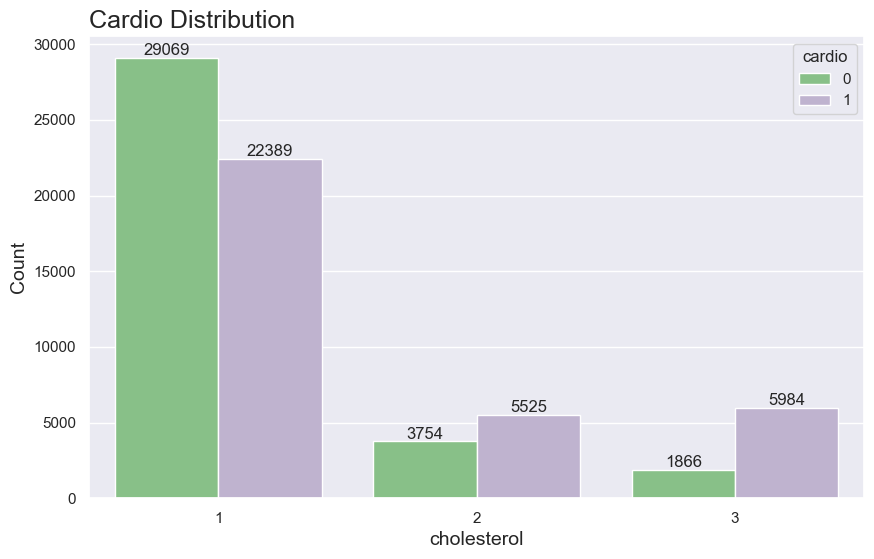

In [18]:
# cardio distribution by 'cholesterol' (Cholesterol)
balanced_target(target='cholesterol', hue='cardio', dataset=df)

total_cardio_0 = df['cardio'].value_counts()[0]
total_cardio_1 = df['cardio'].value_counts()[1]

print('Total count of cardio = 0:', total_cardio_0)
print('Total count of cardio = 0:', total_cardio_1)

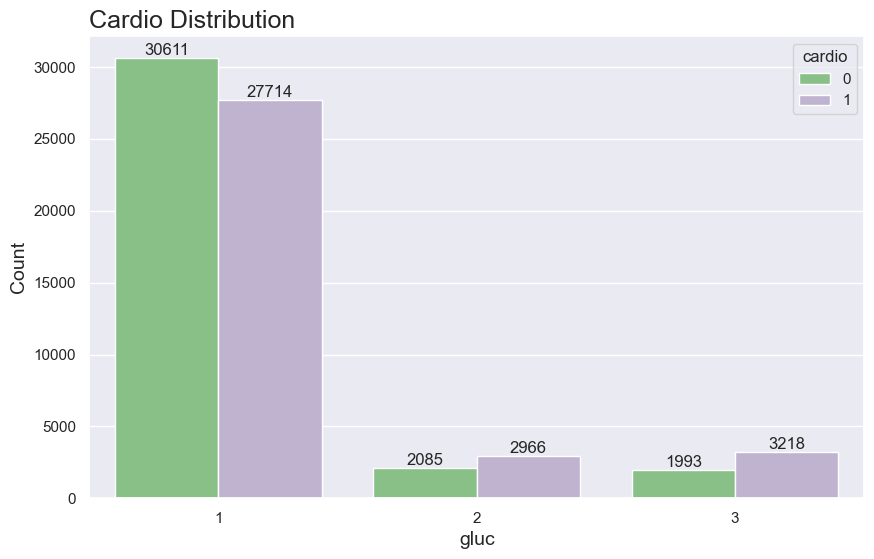

In [19]:
# cardio distribution by 'gluc' (Glucose)
balanced_target(target='gluc',hue='cardio', dataset=df)

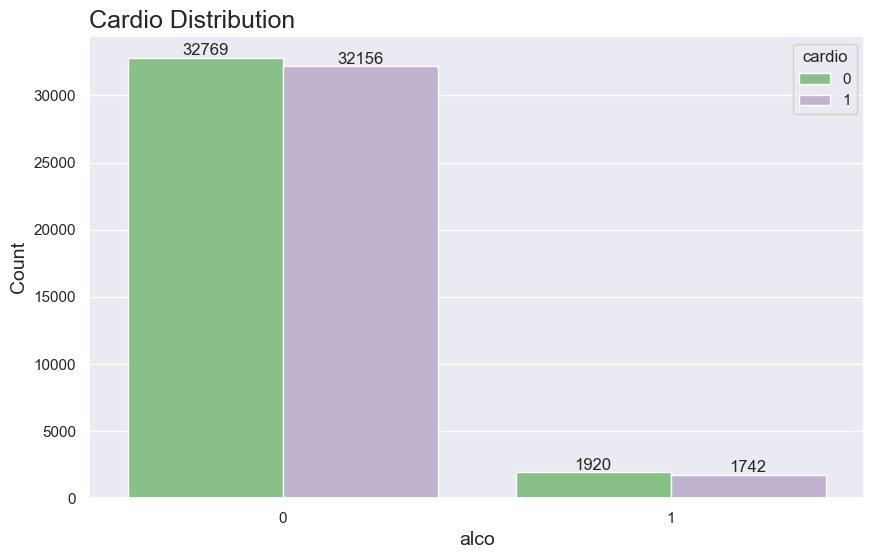

In [20]:
# cardio distribution by 'alco' (Alcohol)
balanced_target(target='alco',hue='cardio', dataset=df)

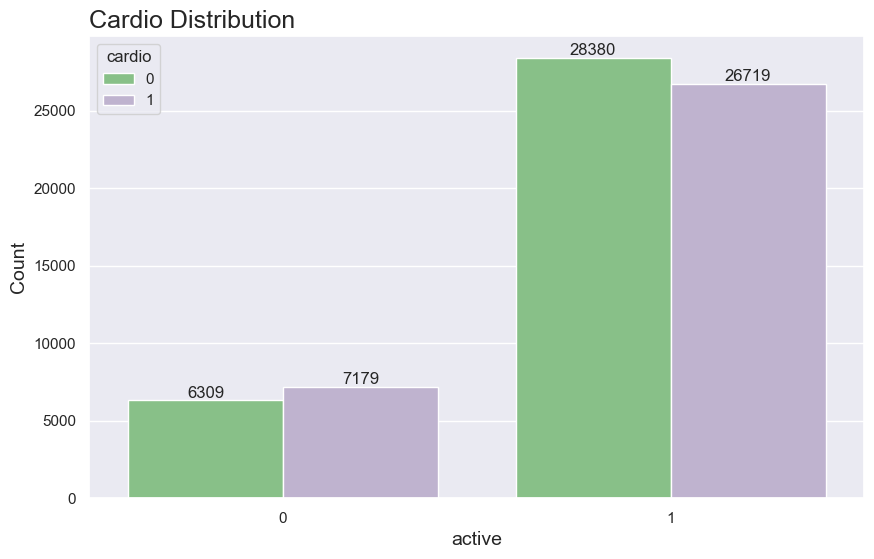

In [21]:
# cardio distribution by 'active' (Physical Activity)
balanced_target(target='active',hue='cardio', dataset=df)

## Exploratory Data Analysis Part I:
---

Cleaning the Data and removing outliers if necessary.


In [22]:
# Changing column names and variable description to make the data more readable

In [23]:
df_cleaned = df.copy()
df_cleaned.rename(columns = {'ap_hi': 'Systolic_BP'}, inplace = True)
df_cleaned.rename(columns = {'ap_lo': 'Diastolic_BP'}, inplace = True)
df_cleaned.rename(columns = {'gluc': 'Glucose'}, inplace = True)
df_cleaned.rename(columns = {'alco': 'Alcohol'}, inplace = True)
df_cleaned.rename(columns = {'cardio': 'Cardio_Patient'}, inplace = True)

# Dropping unneeded ID column
df_cleaned.drop("id", axis=1, inplace=True);

# Replacing data in columns for readibility
df_cleaned['gender'] = df_cleaned['gender'].replace(1, 'Male')
df_cleaned['gender'] = df_cleaned['gender'].replace(2, 'Female')
df_cleaned['cholesterol'] = df_cleaned['cholesterol'].replace(1, 'Normal')
df_cleaned['cholesterol'] = df_cleaned['cholesterol'].replace(2, 'Above_Normal')
df_cleaned['cholesterol'] = df_cleaned['cholesterol'].replace(3, 'Well_Above_Normal')
df_cleaned['Glucose'] = df_cleaned['Glucose'].replace(1, 'Normal')
df_cleaned['Glucose'] = df_cleaned['Glucose'].replace(2, 'Above_Normal')
df_cleaned['Glucose'] = df_cleaned['Glucose'].replace(3, 'Well_Above_Normal')
df_cleaned['smoke'] = df_cleaned['smoke'].replace(1, 'Yes')
df_cleaned['smoke'] = df_cleaned['smoke'].replace(0, 'No')
df_cleaned['Alcohol'] = df_cleaned['Alcohol'].replace(1, 'Yes')
df_cleaned['Alcohol'] = df_cleaned['Alcohol'].replace(0, 'No')
df_cleaned['active'] = df_cleaned['active'].replace(1, 'Yes')
df_cleaned['active'] = df_cleaned['active'].replace(0, 'No')
df_cleaned['Cardio_Patient'] = df_cleaned['Cardio_Patient'].replace(1, 'Yes')
df_cleaned['Cardio_Patient'] = df_cleaned['Cardio_Patient'].replace(0, 'No')

# Set all columns to upper case
df_cleaned.columns = df_cleaned.columns.str.upper()
df_cleaned

,AGE,GENDER,HEIGHT,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,ACTIVE,CARDIO_PATIENT,BMI
0,18393,Female,168,62,110,80,Normal,Normal,No,No,Yes,No,21.967120
1,20228,Male,156,85,140,90,Well_Above_Normal,Normal,No,No,Yes,Yes,34.927679
2,18857,Male,165,64,130,70,Well_Above_Normal,Normal,No,No,No,Yes,23.507805
3,17623,Female,169,82,150,100,Normal,Normal,No,No,Yes,Yes,28.710479
4,17474,Male,156,56,100,60,Normal,Normal,No,No,No,No,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,Female,168,76,120,80,Normal,Normal,Yes,No,Yes,No,26.927438
69996,22601,Male,158,126,140,90,Above_Normal,Above_Normal,No,No,Yes,Yes,50.472681
69997,19066,Female,183,105,180,90,Well_Above_Normal,Normal,No,Yes,No,Yes,31.353579
69998,22431,Male,163,72,135,80,Normal,Above_Normal,No,No,No,Yes,27.099251


### Cleaned Variable Description:

Format: Column Description (COLUMN NAME):

    1. Age (AGE) - Numerical - Days
    2. Height (HEIGHT) - Numerical - Cm
    3. Weight (WEIGHT) - Numerical - Kg
    4. Gender (GENDER) - Categorical - Male/Female
    5. Systolic Blood Pressure (SYSTOLIC_BP) - Numerical - mmHg
    6. Diastolic Blood Pressure (DIASTOLIC_BP) - Numerical - mmHg
    7. Cholesterol (CHOLESTEROL) - Categorical - Normal/Above_Normal/Well_Above_Normal
    8. Glucose (GLOCOSE) - Categorical - Normal/Above_Normal/Well_Above_Normal
    9. Smoking (SMOKE) - Categorical - Yes/No
    10. Alcohol Intake (ALCOHOL) - Categorical - Yes/No
    11. Physical Activity (ACTIVE) - Categorical - Yes/No
    12. Patient of Cardio Disease (CARDIO_PATIENT) - Categorical - Yes/No
    13. BMI - Numerical - Kg/m**2

Based on the information provided, a suitable reason to justify the exclusion of heart rate from the variables used in the cardiovascular disease prediction model is that heart rate may not be a direct or accurate measure of cardiovascular disease risk. Although heart rate is commonly used as an indicator of overall cardiovascular health, there are many other factors that can affect heart rate, such as stress, physical activity, and even medication. Additionally, heart rate is not always a reliable indicator of heart disease risk, as some individuals with a normal heart rate may still be at increased risk for cardiovascular events.

Therefore, to build a more accurate and reliable cardiovascular disease prediction model, it may be best to focus on the other variables mentioned, such as age, BMI, cholesterol, glucose, smoking, and alcohol consumption. These factors have been shown to be more directly linked to cardiovascular disease risk and can provide a more comprehensive assessment of an individual's overall health and risk for developing cardiovascular disease.

In conclusion, the exclusion of heart rate from the cardiovascular disease prediction model is justifiable based on its limited direct correlation with cardiovascular disease risk. By focusing on the other variables that have been shown to be more closely linked to cardiovascular disease risk, we can build a more accurate and reliable model for predicting an individual's risk of developing this condition.

---
## 5.0 Hypothesis Test:
**What is Hypothesis Testing?**

Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population parameter to the test. It is used to estimate the relationship between 2 statistical variables. For our testing purposes here, we will check the p-value.

**What is p-Value?:**

A p-value is a statistical measurement used to validate a hypothesis against observed data. It measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference. A p-value of 0.05 or lower is generally considered statistically significant.

The p-value can serve as an alternative to—or in addition to—preselected confidence levels for hypothesis testing.

**Hypothesis Tests:**

1. Does the 'age' affect the number of cases of cardiovascular diseases? (age vs. cardio)


2. Does the 'BMI' affect the number of cases of cardiovascular diseases? (BMI vs. cardio)